### **Name: Satyam Singh**
### **Topic: End-Course-Test**

### ***Description***

---



The dataset is similar to MNIST but includes images of certain
clothing and accessory. The objective is to classify images into
specific classes using CNN.

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import  fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ***Dataset:***

---


    
    Total Images: - 70,000
    Train Images: - 60,000
    Test Images:- 10,000
    Image Size:- 28 X 28

Different Classes:
 
    Classes: 'T-shirt/top', 'Trouser',  'Pullover', 'Dress', 'Coat',
    
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'


### ***Creating Dictionaryof Classes***

In [0]:
cloth_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
 
5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

### ***Question 1***

---


A. 

Load Fashion data from Keras Library and Split the same into
Train and Test

In [0]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data() 

B. 

Scale the values of train and test between 0 & 1 by dividing
train & test by 255

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

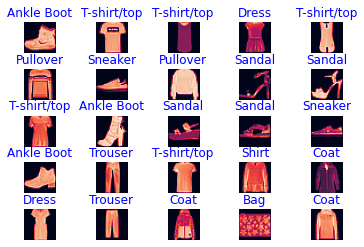

In [0]:
fig, axs=plt.subplots(5,5)
plt.subplots_adjust(wspace=0.5, hspace= 0.5)
k=0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(x_train[k]) 
        axs[i,j].axis(False)
        axs[i,j].set_title(cloth_dict[y_train[k]], color = 'blue')       
        k+=1 

QUESTION 3:

Load the data (again, important)

1. 

Reshape the data to (28,28,1). The actual data is in (28,28)
format and we need to add a single channel, 1 to it. Do the
reshape for both train and test.

In [0]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

In [0]:
print('Train image before reshaping:', x_train.shape)
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
print('Train image after reshaping:', x_train.shape)

Train image before reshaping: (60000, 28, 28)
Train image after reshaping: (60000, 28, 28, 1)


In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

Question 4:

A. 

Build basic CNN on the fashion MNIST Data.


In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),(1,1), input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation= 'softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


B. 

Compile the model with either ADAM or GradientDescent
with Loss as sparse_categorical_crossentropy and metrics
'accuracy'.

C. 

Fit a model with 30 Epochs and 1000 Batch Size


In [0]:
t_len= int(len(x_train)*(0.90))
t_len

54000

In [0]:
x= x_train[:t_len];y= y_train[:t_len] 
val_x= x_train[t_len:];val_y= y_train[t_len:] 

In [0]:
model.compile('adam', 'sparse_categorical_crossentropy', 'accuracy')
model.fit(x,y, epochs= 30, batch_size= 1000, validation_data=(val_x, val_y))  

Epoch 1/30
54/54 [==============================] - 17s 324ms/step - loss: 0.1366 - accuracy: 0.9505 - val_loss: 0.1205 - val_accuracy: 0.9572
Epoch 2/30
54/54 [==============================] - 17s 320ms/step - loss: 0.1172 - accuracy: 0.9593 - val_loss: 0.1281 - val_accuracy: 0.9553
Epoch 3/30
54/54 [==============================] - 17s 319ms/step - loss: 0.1173 - accuracy: 0.9589 - val_loss: 0.1329 - val_accuracy: 0.9525
Epoch 4/30
54/54 [==============================] - 17s 322ms/step - loss: 0.1170 - accuracy: 0.9587 - val_loss: 0.1408 - val_accuracy: 0.9495
Epoch 5/30
54/54 [==============================] - 17s 322ms/step - loss: 0.1131 - accuracy: 0.9610 - val_loss: 0.1431 - val_accuracy: 0.9472
Epoch 6/30
54/54 [==============================] - 17s 322ms/step - loss: 0.1148 - accuracy: 0.9597 - val_loss: 0.1494 - val_accuracy: 0.9445
Epoch 7/30
54/54 [==============================] - 17s 322ms/step - loss: 0.1139 - accuracy: 0.9599 - val_loss: 0.1581 - val_accuracy: 0.9402


Question 5:

Now, let's have the same model, but this time using simple
"categorical_crossentropy" as loss.

In [0]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
Y= Y_train[:t_len];val_Y= Y_train[t_len:] 
Y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10) 

In [0]:
model.compile('adam', 'categorical_crossentropy', 'accuracy')
model.fit(x,Y, epochs= 30, batch_size= 1000, validation_data=(val_x, val_Y))   

Epoch 1/30
54/54 [==============================] - 17s 321ms/step - loss: 0.0945 - accuracy: 0.9658 - val_loss: 0.2248 - val_accuracy: 0.9285
Epoch 2/30
54/54 [==============================] - 17s 320ms/step - loss: 0.0762 - accuracy: 0.9744 - val_loss: 0.2396 - val_accuracy: 0.9240
Epoch 3/30
54/54 [==============================] - 17s 321ms/step - loss: 0.0803 - accuracy: 0.9720 - val_loss: 0.2443 - val_accuracy: 0.9217
Epoch 4/30
54/54 [==============================] - 17s 319ms/step - loss: 0.0750 - accuracy: 0.9750 - val_loss: 0.2433 - val_accuracy: 0.9222
Epoch 5/30
54/54 [==============================] - 17s 318ms/step - loss: 0.0742 - accuracy: 0.9741 - val_loss: 0.2459 - val_accuracy: 0.9252
Epoch 6/30
54/54 [==============================] - 17s 319ms/step - loss: 0.0730 - accuracy: 0.9744 - val_loss: 0.2525 - val_accuracy: 0.9225
Epoch 7/30
54/54 [==============================] - 17s 319ms/step - loss: 0.0746 - accuracy: 0.9741 - val_loss: 0.2572 - val_accuracy: 0.9227

Question 6:

A. 

Save the model as .H5 file, as “my_model”.h5.

In [0]:
model.save('my_model.h5') 

B. 

Now load the "my_model.h5" and evaluate the test_image
and test_label with new_model to check accuracy. 

Print the accuracy.

In [0]:
loaded_model = load_model('my_model.h5') 

In [0]:
predict = loaded_model.predict_classes(x_test)
test_label = list(map(np.argmax,Y_test))
accuracy =  accuracy_score(test_label, predict)
print('Accuracy: ', accuracy)  

Accuracy:  0.8819


Question 7:

Print the Confusion Matrix for predicted classes of test_images
and test_label.

In [0]:
conf_matrix= confusion_matrix(test_label, predict)
conf_matrix

array([[852,   0,  39,  23,  10,   1,  66,   0,   9,   0],
       [  5, 978,   1,   8,   2,   0,   3,   0,   3,   0],
       [ 16,   1, 882,  10,  47,   0,  43,   0,   0,   1],
       [ 38,  14,  39, 851,  32,   1,  24,   0,   1,   0],
       [  3,   2, 115,  29, 816,   1,  33,   0,   1,   0],
       [  1,   0,   0,   0,   0, 963,   0,  16,   4,  16],
       [146,   2, 121,  23,  87,   1, 607,   0,  12,   1],
       [  0,   0,   0,   0,   0,  12,   1, 960,   1,  26],
       [  4,   0,   5,   9,   3,   5,   8,   3, 961,   2],
       [  0,   0,   0,   0,   0,  11,   1,  37,   2, 949]])

Question 8:

Print the count of total misclassification that occurred using the
saved model.


In [0]:
print('Total Mis-Classification Count: ', len(y_test)- accuracy*len(y_test))

Total Mis-Classification Count:  1181.0


Question 9:

Write an experiment that can perform multiple parameters
training. 

Save the intermediate output of each experiment in
the dictionary. 

The key for each experiment will be string combination of (optimizer+Epoch+BatchSize). 

Epochs = [10,30,50]

Batch Size = [500,1000, 5000]

Optimizer = [Adam, RmsProp, SGD]

In [0]:
def experiment(model, batch_size, epochs, optimizers):
    output=dict()
    for optimizer in optimizers:
        for epoch in epochs: 
            for batch_size in batch_sizes:
                model.compile(optimizer, 'categorical_crossentropy', 'accuracy')
                model.fit(x,Y, epochs= epoch, batch_size= batch_size, validation_data=(val_x, val_Y), verbose=0)
                predict = model.predict_classes(x_test)
                test_label = list(map(np.argmax,Y_test))
                accuracy =  accuracy_score(test_label, predict)
                output[f'{optimizer}{epoch}{batch_size}']= accuracy 
            #print(output)


    return output      

In [0]:
batch_sizes=[500,1000,5000]
epochs=[10,30,50]
optimizers=['adam', 'rmsprop','sgd'] 
output = experiment(loaded_model, batch_sizes, epochs, optimizers)

In [0]:
for key, value in output.items():
    print(key,':',value)

adam10500 : 0.8815
adam101000 : 0.881
adam105000 : 0.8812
adam30500 : 0.8811
adam301000 : 0.878
adam305000 : 0.8786
adam50500 : 0.8759
adam501000 : 0.8769
adam505000 : 0.8771
rmsprop10500 : 0.8728
rmsprop101000 : 0.8539
rmsprop105000 : 0.8754
rmsprop30500 : 0.8715
rmsprop301000 : 0.8654
rmsprop305000 : 0.8681
rmsprop50500 : 0.8746
rmsprop501000 : 0.8641
rmsprop505000 : 0.8747
sgd10500 : 0.8741
sgd101000 : 0.8744
sgd105000 : 0.8743
sgd30500 : 0.8749
sgd301000 : 0.8747
sgd305000 : 0.8746
sgd50500 : 0.8743
sgd501000 : 0.8744
sgd505000 : 0.8744
